# API WORKFLOW

In [1]:
# ===============================================================
# IMPORTS
# ===============================================================
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
# ===============================================================
# INPUTS
# ===============================================================
artist_uri = "5TYxZTjIPqKM8K8NuP9woO" # C. Tangana
num_top_tracks = 30
popularity_top = 3

In [3]:
# ===============================================================
# LOAD ENVIROMENT VARIABLES
# ===============================================================
# Absolute path for file .env in project's root
ROOT_DIR = os.path.dirname(os.getcwd())
env_path = os.path.join(ROOT_DIR, ".env")
# load the .env file variables
load_dotenv(env_path)
# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

print("Client ID:",client_id)

Client ID: 37a32ac793994b49b9fbcb6181071aea


In [4]:
# ===============================================================
# CONNECT TO SPOTIFY API
# ===============================================================
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)
display(spotify)

In [5]:
# ===============================================================
# GET TRACKS
# ===============================================================
artist_name = spotify.artist(artist_id=artist_uri)
artist_name = artist_name["name"]
top_tracks = spotify.artist_top_tracks(artist_id=artist_uri)
top_tracks = top_tracks["tracks"][:num_top_tracks]
print("Selected artist:",artist_name)

Selected artist: C. Tangana


In [6]:
# ===============================================================
# BUILD DATAFRAME
# ===============================================================
top_tracks_name = []
top_tracks_popularity = []
top_tracks_duration = []
for track in top_tracks:
    name = track["name"]
    popularity = track["popularity"]
    duration_min = track["duration_ms"] / 1000 / 60   # Convert ms → min
    top_tracks_name.append(name)
    top_tracks_popularity.append(popularity)
    top_tracks_duration.append(duration_min)

top_tracks_df = pd.DataFrame({
    "name": top_tracks_name,
    "popularity": top_tracks_popularity,
    "duration_min": top_tracks_duration
})

print(f"TOP tracks by {artist_name}:\n {top_tracks_df} \n\n")
top_popular_tracks_df = top_tracks_df.sort_values("popularity",ascending=False)[:3]
print(f"TOP {popularity_top} popular tracks by {artist_name}:\n {top_popular_tracks_df} \n")

TOP tracks by C. Tangana:
                                name  popularity  duration_min
0                             DROGA          76      3.710433
1           Tú Me Dejaste De Querer          72      3.308217
2                Demasiadas Mujeres          72      2.566000
3                        Mala Mujer          66      3.714933
4  Antes de Morirme - feat. ROSALÍA          65      3.333233
5                      Ingobernable          68      3.117550
6                       Nunca Estoy          67      2.708217
7                              Ateo          61      4.000000
8                  No Te Debí Besar          65      3.046917
9                    Comerte Entera          64      2.908000 


TOP 3 popular tracks by C. Tangana:
                       name  popularity  duration_min
0                    DROGA          76      3.710433
1  Tú Me Dejaste De Querer          72      3.308217
2       Demasiadas Mujeres          72      2.566000 



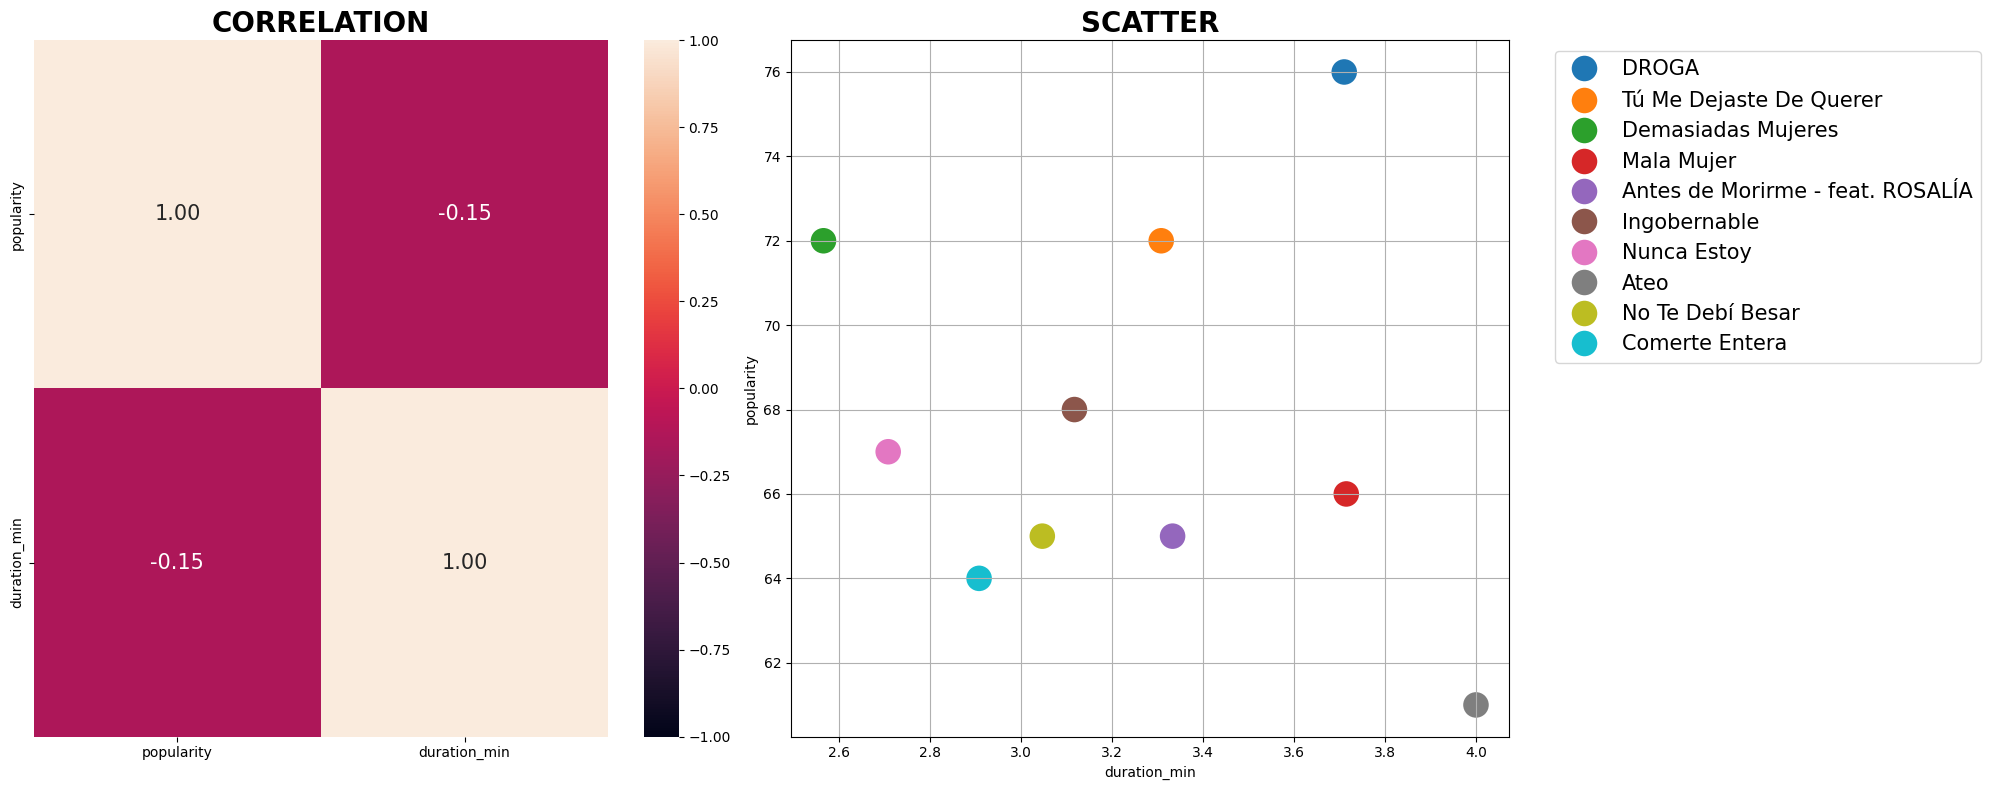

In [7]:
# ===============================================================
# DISPLAY DATA
# ===============================================================
corr_matrix = top_tracks_df[["popularity", "duration_min"]].corr()
corr_order = corr_matrix.mean().sort_values(ascending=False).index
corr_matrix = corr_matrix.loc[corr_order, corr_order]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20, 8))

sns.heatmap(
    ax= axes[0],
    data=corr_matrix,
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    annot_kws={"size": 15}
)
axes[0].set_title("CORRELATION", fontsize=20, fontweight="bold")

sns.scatterplot(
    ax= axes[1],
    data=top_tracks_df,
    x="duration_min",
    y="popularity",
    hue="name",
    s = 400
   )

axes[1].set_title("SCATTER", fontsize=20, fontweight="bold")
axes[1].legend(title="",fontsize=15,bbox_to_anchor=(1.05, 1))
axes[1].grid(True)

plt.tight_layout()
plt.show()

CONCLUSIONS:
- For C. Tangana, his tracks have the tendency to be more popular if they have a shorter duration (negative correlation)